In [77]:
import pandas as pd
import numpy as np
training = pd.read_excel('training.xlsx')
scoring = pd.read_excel("scoring.xlsx")


In [78]:
training.shape

(41053, 10)

In [79]:
scoring.shape

(7546, 10)

In [80]:
training = training.rename(columns={'Date': 'year'})
training = training.rename(columns={'Vehicle Category': 'vehicleCategory'})
training = training.rename(columns={'GVWR Class': 'gvwrClass'})
training = training.rename(columns={'Fuel Type': 'fuelType'})
training = training.rename(columns={"Model Year": "modelYear"})
training = training.rename(columns={"Fuel Technology": "fuelTechnology"})
training = training.rename(columns={"Electric Mile Range": "electricMileRange"})
training = training.rename(columns={"Number of Vehicles Registered at the Same Address": "numVehiclesReg"})
training = training.rename(columns={"Vehicle Population:": "vehiclePopulation"})

#Using the mean as our dataset does not contain that many outliers etc.

In [81]:
# fill missing values with the mean of our modelYear column
training['modelYear'].fillna(training['modelYear'].mean(), inplace=True)

C:\Users\ginap\AppData\Local\Temp\ipykernel_23560\2663670663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training['modelYear'].fillna(training['modelYear'].mean(), inplace=True)


In [82]:
#Dropping the Region column
training = training.drop(columns=['Region'])

In [83]:
training["gvwrClassKN"] = training["gvwrClass"].apply(lambda x:  1 if x == "Unknown" else 0)
training["gvwrClassNA"] = training["gvwrClass"].apply(lambda x:  1 if x == "Not Applicable" else 0)
training["gvwrClass"] = training["gvwrClass"].replace("Unknown", -1)
training["gvwrClass"] = training["gvwrClass"].replace("Not Applicable", 0)

C:\Users\ginap\AppData\Local\Temp\ipykernel_23560\415421987.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training["gvwrClass"] = training["gvwrClass"].replace("Not Applicable", 0)


#Our GVWR Column, 
#Not applicable = 0
#Unkown isss?
#So add a column where gvwr type included (binary)

In [84]:
print(training["gvwrClass"].apply(type).value_counts())

gvwrClass
<class 'int'>    41053
Name: count, dtype: int64


In [85]:
#electricMileRange, we are going to later on OneHotEncode this column
#fuelType, we are going to later on OneHotEncode this column
#numVehiclesReg, we are going to later on OneHotEncode this column

In [86]:
#An option, if this doesn't give us the results we want, we can OneHotEncode this instead
training

,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,gvwrClassNA
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,≥4,395883,0,1
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,1
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,1
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,≥4,348475,0,1
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,≥4,333296,0,1
...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,1
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,1
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,1
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,1


In [87]:
training["numVehiclesReg"] = training["numVehiclesReg"].apply(lambda x:  4 if x == "≥4" else x)
training["numVehiclesRegKN"] = training["numVehiclesReg"].apply(lambda x:  1 if x == "Unknown" else 0)
training["numVehiclesReg"] = training["numVehiclesReg"].replace("Unknown", -1)
training

C:\Users\ginap\AppData\Local\Temp\ipykernel_23560\1776417714.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training["numVehiclesReg"] = training["numVehiclesReg"].replace("Unknown", -1)


,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,gvwrClassNA,numVehiclesRegKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,0,1,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,1,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,1,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,0,1,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,1,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,1,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,1,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,1,0


In [88]:
print(training.dtypes)


year                    int64
vehicleCategory        object
gvwrClass               int64
fuelType               object
modelYear             float64
fuelTechnology         object
electricMileRange      object
numVehiclesReg          int64
Vehicle Population      int64
gvwrClassKN             int64
gvwrClassNA             int64
numVehiclesRegKN        int64
dtype: object


In [89]:
print(training['vehicleCategory'].apply(type).value_counts())

vehicleCategory
<class 'str'>    41053
Name: count, dtype: int64


In [90]:
print(training['gvwrClass'].apply(type).value_counts())

gvwrClass
<class 'int'>    41053
Name: count, dtype: int64


In [91]:
print(training['fuelType'].apply(type).value_counts())

fuelType
<class 'str'>    41053
Name: count, dtype: int64


In [92]:
print(training['modelYear'].apply(type).value_counts())

modelYear
<class 'float'>    41053
Name: count, dtype: int64


In [93]:
print(training['numVehiclesReg'].apply(type).value_counts())

numVehiclesReg
<class 'int'>    41053
Name: count, dtype: int64


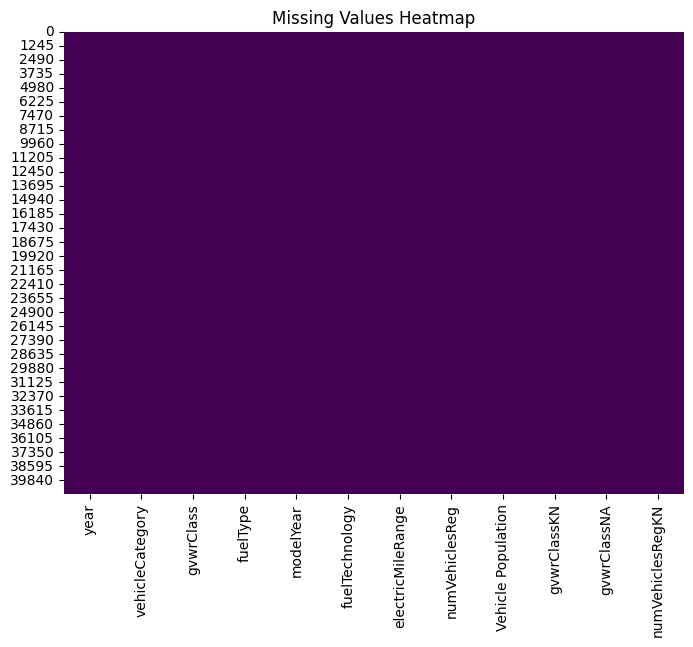

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(training.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [95]:
training

,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,gvwrClassNA,numVehiclesRegKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,0,1,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,1,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,1,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,0,1,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,1,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,1,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,1,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,1,0


In [96]:
training = pd.get_dummies(training, 
                          columns=["vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange", "gvwrClass"], 
                          prefix=["vehicleCategory", "fuelType", "fuelTech", "electricRange", "gvwrClass"], 
                          prefix_sep="_")


In [97]:
training

,year,modelYear,numVehiclesReg,Vehicle Population,gvwrClassKN,gvwrClassNA,numVehiclesRegKN,vehicleCategory_B,vehicleCategory_BS,vehicleCategory_BT,...,gvwrClass_-1,gvwrClass_0,gvwrClass_1,gvwrClass_2,gvwrClass_3,gvwrClass_4,gvwrClass_5,gvwrClass_6,gvwrClass_7,gvwrClass_8
0,2019,2020.0,4,395883,0,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2020,2020.0,1,370954,0,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2021,2020.0,1,349406,0,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2019,2019.0,4,348475,0,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2019,2018.0,4,333296,0,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,1983.0,1,1,0,1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
41049,2019,1980.0,2,1,0,1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
41050,2019,1978.0,3,1,0,1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
41051,2019,1976.0,2,1,0,1,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [98]:
print(training.columns.tolist())


['year', 'modelYear', 'numVehiclesReg', 'Vehicle Population', 'gvwrClassKN', 'gvwrClassNA', 'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS', 'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH', 'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2', 'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5', 'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen', 'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV', 'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV', 'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles', 'electricRange_51 to 100 miles', 'electricRange_>150 miles', 'electricRange_Not Applicable', 'electricRange_Unknown', 'gvwrClass_-1', 'gvwrClass_0', 'gvwrClass_1', 'gvwrClass_2', 'gvwrClass_3', 'gvwrClass_4', 'gvwrClass_5', 'gvwrClass_6', 'gvwrClass_7', 'gvwrClass_8']


In [99]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'training' is your dataset


In [100]:
X = training.drop(columns=["Vehicle Population"])  # Features
y = training["Vehicle Population"]  # Target variable


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Define training and validation datasets correctly
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# Updated parameters based on Bayesian Optimization results
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': int(81.94562010166663),
    'max_depth': int(10.32559568840523),
    'learning_rate': 0.3,
    'n_estimators': int(117.14689484673896),
    'min_child_samples': int(9.787194938765415),
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'lambda_l1': 0.01,
    'lambda_l2': 0.01,
    'feature_pre_filter': False  # Disable feature pre-filtering to avoid the issue
}

# Train the model with the updated hyperparameters and early stopping
model = lgb.train(params, 
                  train_data, 
                  valid_sets=[valid_data],  # Validation data
                  valid_names=["validation"],  # Naming the validation set
                  num_boost_round=1000,  # Max boosting rounds
                  )  # Early stopping after 50 rounds of no improvement

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 32842, number of used features: 45
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3446.059132


C:\Users\ginap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

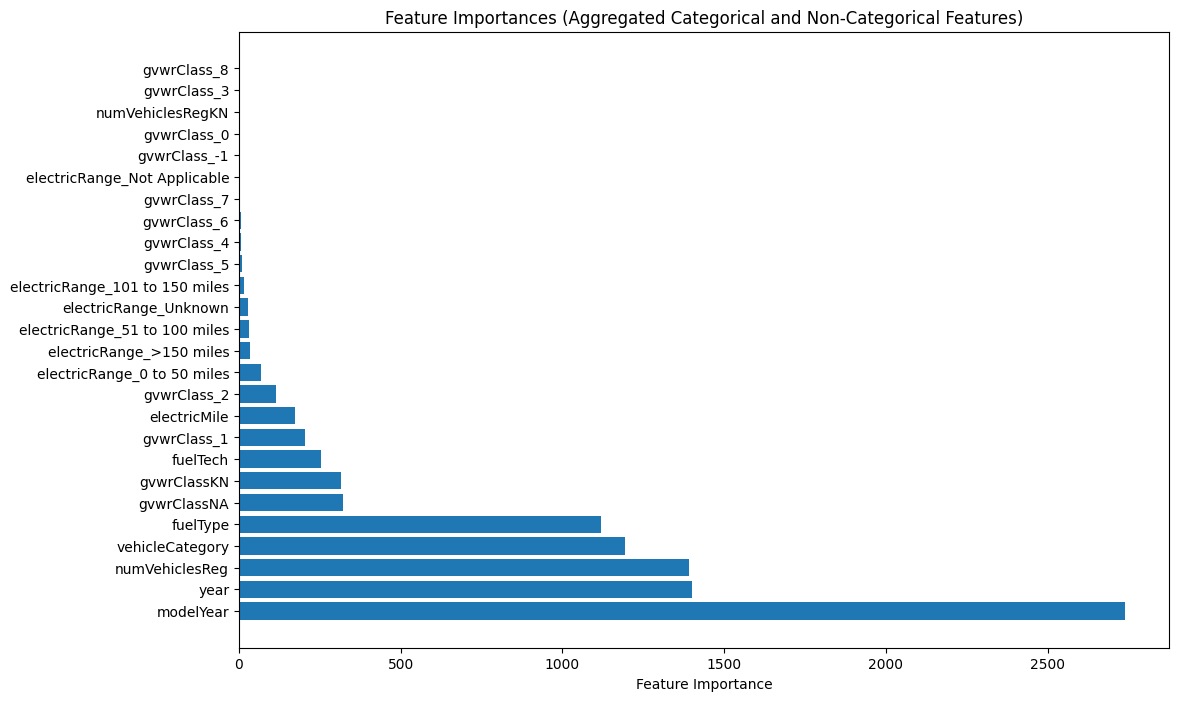

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importances
feature_importance = model.feature_importance(importance_type='split')  # or 'gain' for more insight
feature_names = X.columns

# Create a dictionary to hold the aggregated importance per original categorical feature
aggregated_importance = {}

# Specify the original categorical feature groups and their corresponding one-hot encoded columns
categorical_feature_groups = {
    'vehicleCategory': [col for col in X.columns if col.startswith('vehicleCategory')],
    'fuelType': [col for col in X.columns if col.startswith('fuelType')],
    'fuelTech': [col for col in X.columns if col.startswith('fuelTech')],
    'electricMile': [col for col in X.columns if col.startswith('electricRange')]
}

# Aggregate feature importances for each categorical feature
for cat_feature, cat_columns in categorical_feature_groups.items():
    cat_importance = np.sum([feature_importance[feature_names.get_loc(col)] for col in cat_columns])
    aggregated_importance[cat_feature] = cat_importance

# Create a dictionary for non-categorical features
non_categorical_importance = {
    feature: feature_importance[feature_names.get_loc(feature)] 
    for feature in X.columns if not any(feature.startswith(cat) for cat in categorical_feature_groups)
}

# Create DataFrames for categorical and non-categorical feature importances
aggregated_importances_df = pd.DataFrame({
    'feature': list(aggregated_importance.keys()),
    'importance': list(aggregated_importance.values())
})

non_categorical_importances_df = pd.DataFrame({
    'feature': list(non_categorical_importance.keys()),
    'importance': list(non_categorical_importance.values())
})

# Combine both dataframes
combined_importances_df = pd.concat([aggregated_importances_df, non_categorical_importances_df], ignore_index=True)

# Sort by importance
combined_importances_df = combined_importances_df.sort_values(by='importance', ascending=False)

# Plot the combined feature importances
plt.figure(figsize=(12, 8))
plt.barh(combined_importances_df['feature'], combined_importances_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Aggregated Categorical and Non-Categorical Features)')
plt.show()


In [105]:
y_pred = model.predict(X_test)

# Evaluate performance using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 3718.612889438868


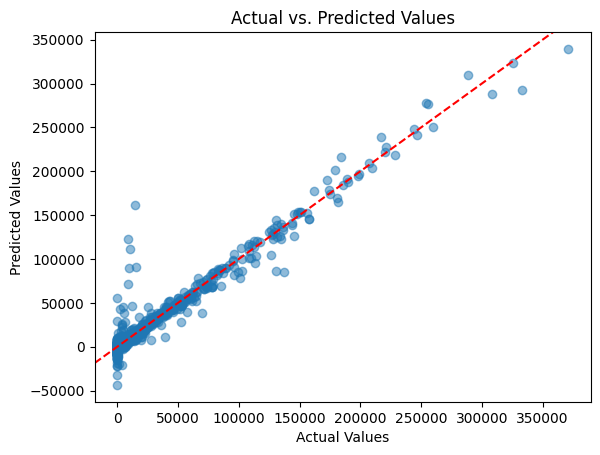

In [106]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Perfect prediction line
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

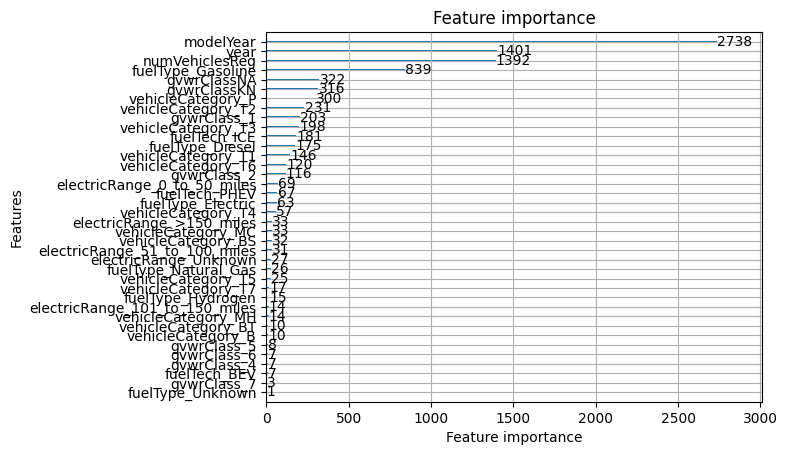

In [107]:
lgb.plot_importance(model)


In [108]:
import pandas as pd

# Load the scoring dataset
scoring_df = pd.read_excel("scoring.xlsx")

# Preview the first few rows
print(scoring_df.head())


   Date Vehicle Category      GVWR Class Fuel Type  Model Year  \
0  2024                P  Not Applicable  Gasoline      2020.0   
1  2024                P  Not Applicable  Gasoline      2021.0   
2  2024                P  Not Applicable  Gasoline      2022.0   
3  2024                P  Not Applicable  Gasoline      2024.0   
4  2024                P  Not Applicable  Gasoline      2023.0   

  Fuel Technology Electric Mile Range  \
0             ICE      Not Applicable   
1             ICE      Not Applicable   
2             ICE      Not Applicable   
3             ICE      Not Applicable   
4             ICE      Not Applicable   

  Number of Vehicles Registered at the Same Address     Region  \
0                                                ≥4  Statewide   
1                                                ≥4  Statewide   
2                                                ≥4  Statewide   
3                                                ≥4  Statewide   
4                         

In [109]:
scoring_df = scoring_df.rename(columns={
    'Date': 'year',
    'Vehicle Category': 'vehicleCategory',
    'GVWR Class': 'gvwrClass',
    'Fuel Type': 'fuelType',
    "Model Year": "modelYear",
    "Fuel Technology": "fuelTechnology",
    "Electric Mile Range": "electricMileRange",
    "Number of Vehicles Registered at the Same Address": "numVehiclesReg",
    "Vehicle Population:": "vehiclePopulation"
})

# Fill missing values with the mean of the modelYear column
scoring_df['modelYear'].fillna(scoring_df['modelYear'].mean(), inplace=True)

# Dropping the Region column
scoring_df = scoring_df.drop(columns=['Region'])

# Encode GVWR Class
scoring_df["gvwrClassKN"] = scoring_df["gvwrClass"].apply(lambda x: 1 if x == "Unknown" else 0)
scoring_df["gvwrClass"] = scoring_df["gvwrClass"].replace("Unknown", -1)
scoring_df["gvwrClass"] = scoring_df["gvwrClass"].replace("Not Applicable", 0)

# Encode numVehiclesReg
scoring_df["numVehiclesReg"] = scoring_df["numVehiclesReg"].apply(lambda x: 4 if x == "≥4" else x)
scoring_df["numVehiclesRegKN"] = scoring_df["numVehiclesReg"].apply(lambda x: 1 if x == "Unknown" else 0)
scoring_df["numVehiclesReg"] = scoring_df["numVehiclesReg"].replace("Unknown", -1)

# One-hot encoding for categorical columns
scoring_df = pd.get_dummies(scoring_df,
                            columns=["vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange"],
                            prefix=["vehicleCategory", "fuelType", "fuelTech", "electricRange"],
                            prefix_sep="_")

# Assuming the target column in scoring_df is 'vehiclePopulation'
y_scoring_actual = scoring_df['Vehicle Population']  # Actual values
# Drop the 'Vehicle Population' column from scoring_df
scoring_df = scoring_df.drop(columns=['Vehicle Population'])
if 'fuelType_Unknown' not in scoring_df.columns:
    scoring_df['fuelType_Unknown'] = 0




C:\Users\ginap\AppData\Local\Temp\ipykernel_23560\261830792.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scoring_df['modelYear'].fillna(scoring_df['modelYear'].mean(), inplace=True)
C:\Users\ginap\AppData\Local\Temp\ipykernel_23560\261830792.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [110]:
scoring_df

,year,gvwrClass,modelYear,numVehiclesReg,gvwrClassKN,numVehiclesRegKN,vehicleCategory_B,vehicleCategory_BS,vehicleCategory_BT,vehicleCategory_MC,...,fuelTech_FCEV,fuelTech_ICE,fuelTech_PHEV,electricRange_0 to 50 miles,electricRange_101 to 150 miles,electricRange_51 to 100 miles,electricRange_>150 miles,electricRange_Not Applicable,electricRange_Unknown,fuelType_Unknown
0,2024,0,2020.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
1,2024,0,2021.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,2024,0,2022.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
3,2024,0,2024.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
4,2024,0,2023.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,2024,0,1989.0,3,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7542,2024,0,1988.0,2,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7543,2024,0,1988.0,3,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7544,2024,0,1987.0,2,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0


In [111]:
len(scoring_df.columns)

35

In [112]:
# Re-run the prediction
y_scoring_pred = model.predict(scoring_df)

LightGBMError: The number of features in data (35) is not the same as it was in training data (45).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

In [574]:
# Calculate RMSE
rmse_scoring = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))

In [575]:
rmse_scoring

26692.539931095103

In [576]:
scoring_df.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelTech_BEV', 'fuelTech_FCEV', 'fuelTech_ICE',
       'fuelTech_PHEV', 'electricRange_0 to 50 miles',
       'electricRange_101 to 150 miles', 'electricRange_51 to 100 miles',
       'electricRange_>150 miles', 'electricRange_Not Applicable',
       'electricRange_Unknown', 'fuelType_Unknown'],
      dtype='object')

In [577]:
X_train.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV',
       'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV',
       'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles',
       'electricRange_51 to 100 miles', 'electricRange_>150 miles',
       'electricRange_Not Applicable', 'electricRange_Unknown'],
      dtype='object')

In [578]:
# Reorder scoring_df columns to match X_train
scoring_df = scoring_df[X_train.columns]


In [579]:
scoring_df.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV',
       'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV',
       'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles',
       'electricRange_51 to 100 miles', 'electricRange_>150 miles',
       'electricRange_Not Applicable', 'electricRange_Unknown'],
      dtype='object')

In [584]:
# Re-run the prediction
y_scoring_pred = model.predict(scoring_df)
# Calculate RMSE
rmse_scoring = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))
rmse_scoring

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))
print(f"RMSE: {rmse}")

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_scoring_actual, y_scoring_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Explained Variance Score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_scoring_actual, y_scoring_pred)
print(f"Explained Variance Score: {evs}")


RMSE: 6075.912181219092
Mean Absolute Error: 1175.1560209825795
R-squared: 0.902579463761458
Mean Squared Error: 36916708.83388655
Explained Variance Score: 0.9025923179123508


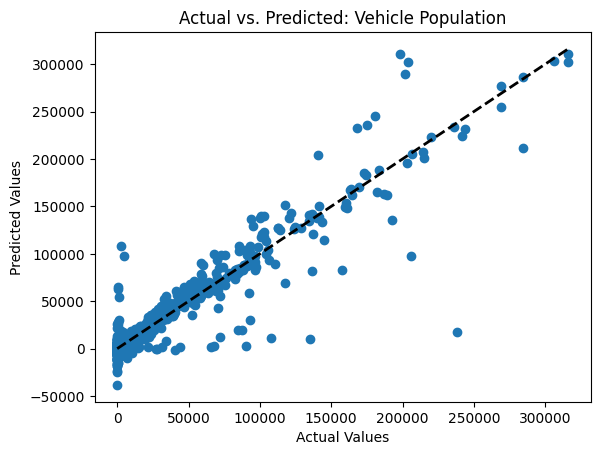

In [581]:
plt.scatter(y_scoring_actual, y_scoring_pred)
plt.plot([min(y_scoring_actual), max(y_scoring_actual)],
         [min(y_scoring_actual), max(y_scoring_actual)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted: Vehicle Population')
plt.show()


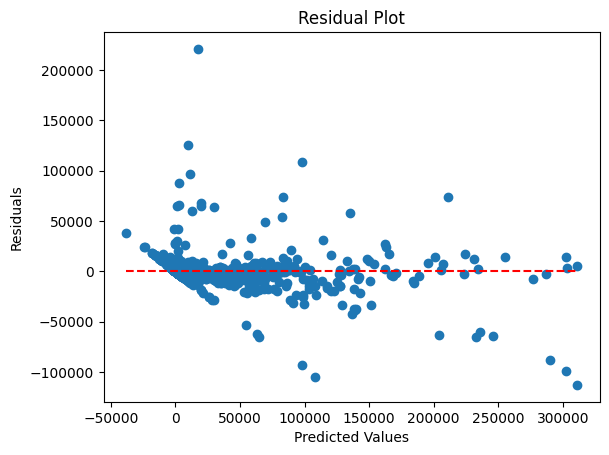

In [582]:
# Calculate residuals
residuals = y_scoring_actual - y_scoring_pred

plt.scatter(y_scoring_pred, residuals)
plt.hlines(y=0, xmin=min(y_scoring_pred), xmax=max(y_scoring_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


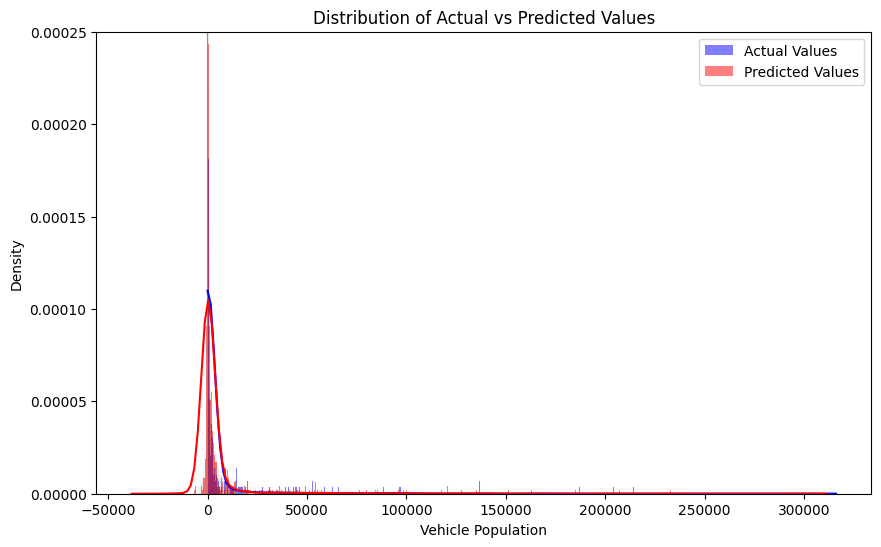

In [583]:
plt.figure(figsize=(10, 6))
sns.histplot(y_scoring_actual, color='blue', kde=True, label='Actual Values', stat='density')
sns.histplot(y_scoring_pred, color='red', kde=True, label='Predicted Values', stat='density')
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.ylim(0, 0.00025)  # Set the density range from 0 to 0.002
plt.show()
